# Regularization and Validation


What are impulse terms:
     - impulse terms have an additional monumentum terms in the weight update. These terms prevent the gradient from jumping to much from side to side.

     ==> you have a additional constant for the direction of the previous update


Adaptive step size of the learning parameter:


Behavior of the Gradient descent step:

     - We can control the the scope: basically the direction
     - online : only one tuple at a time -> very noisy estimate of the Error term
     - batch : the entire dataset at once 
     - mini-batch : a subset of the entire -> noisy estimate of E
     - we can control the learning rate : how big the step is within the given direction

1. How does the convergence speed of gradient descent depend on the learning rate η?

     We can control the behavior of the gradient descent with the learning rate. If the step size is  very very large , we might oscillate and overshoot the minumum. If the step size is very small it takes ages to converge. 



# The hessian Matrix

The hessian matrix is the "crossproduct" of all the second-order partial derivatives of a scalar valued function.

The hessian Matrix can be used to for the secodn order partial derivative test. A test to determine the if a point if a point is local minimum, maximum or saddle point

Symmetric : A = tranposed(A)
 ==> symmetric matrices have real eigenvalues and a complete set of orthonormal eigenvectors

positive - definite matrix : all eigenvalues are positive

negative defnite matrix : all eigenvalues are negavtive

covariance matrix : is the crossproduct of the covariances off all random variables in a random vector

covariance : the tendency of the linear realtionship



# The Conjugate Gradient Method

- This is a Method to not use the second derivative (the Hessian)
-  efficient minimization of quadratic functions (without
the use of second derivatives)




# Some Notes

The gradient is also known as the residual. The residual indicates how far we are from the the optimal parameters.


In [2]:
"""
Matrices , Symmetries, Transposing difinites and so on
"""

A = [
     [1,2,3],
     [3,4,5],
     [4,5,6]
]


def isQuadratic(matrix : list[list[int]])-> bool:
     lenght = len(matrix)
     for x in matrix:
          if len(x) != lenght:
               return False
     
     return True

# A[i, j] = A[j, i] : switch columns and rows
def transpose(matrix : list[list[int]]) -> list[list[int]]:
     transposed = []
     for row in matrix:
          pass


# should be quadratic and A = tranposed(A)
def isSymmetric(matrix : list[list[int]])-> bool:
     return True



In [3]:
# some constants
import numpy as np

data = [[-1, -0.1], [0.3, 0.5], [2, 0.5]]

FIRST_INIT = np.array([-0.45 , 0.2]).reshape(2,1)
print(np.shape(FIRST_INIT))

HESSIAN_FOR_DATA =  np.array( [
     [1, 0.43333],
     [0.43333, 1.6967]
]).reshape(2, 2)
print(np.shape(HESSIAN_FOR_DATA))

X = np.array([
     [1, 1, 1],
     [-1, 0.3, 2]
]).reshape(2,3)
print(np.shape(X))

Y_true = np.array([-0.1, 0.5, 0.5]).reshape(3, 1)
print(np.shape(Y_true))
LENGHT_DATA = 3

GRADIENT_DESCENT_LEARNING_RATES = [0.2, 0.5, 0.7]

(2, 1)
(2, 2)
(2, 3)
(3, 1)


In [11]:

import matplotlib.pyplot as plt


# This class implements several Gradient Descent variations
class Perceptron:

     def __init__(self, starting_weights : np.ndarray, stopping_epsilon : float, max_iterations : int, ):
          self.starting_weights = np.array(starting_weights)
          self.stopping_epsilon = stopping_epsilon
          self.max_interations = max_iterations
     
     # we have one cost function g(t) = g(w_t)
     def cost_function_gradient(self,  weight_vector : np.ndarray) -> np.ndarray:
          return np.dot(HESSIAN_FOR_DATA, weight_vector) - (1 / LENGHT_DATA) * np.dot(X, Y_true)
     

     def learning_rate_line_search(self, gradient : np.ndarray) -> float:

          nominator = np.dot(gradient.T, gradient)
          denominator = np.dot(np.dot(gradient.T, HESSIAN_FOR_DATA), gradient)
          if float(denominator) != 0:
               return float(nominator) / float(denominator)
          else:
               return 0
     
     # standard batch gradient descent
     def standard_gradient_descent(self, learning_rate : float) -> tuple[list[float], list[float]]:
          w_0 = []
          w_1 = []
          counter_interations = 0
          curr_weight_vector = self.starting_weights
          while  counter_interations < self.max_interations:
               gradient = self.cost_function_gradient(curr_weight_vector)
               curr_weight_vector = curr_weight_vector - learning_rate * gradient
               w_0.append(float(curr_weight_vector[0]))
               w_1.append(float(curr_weight_vector[1]))
               counter_interations += 1
          
          return w_0, w_1
     
     def line_search_gradient_descent(self) -> tuple[list[float], list[float]]:
          w_0 = []
          w_1 = []
          learning_rates = []
          counter_iterations = 0
          curr_weight_vector = self.starting_weights
          while counter_iterations < self.max_interations:
               gradient = self.cost_function_gradient(curr_weight_vector)
               learning_rate_for_step = self.learning_rate_line_search(gradient)
               learning_rates.append(learning_rate_for_step)
               curr_weight_vector = curr_weight_vector - learning_rate_for_step * gradient
               w_0.append(float(curr_weight_vector[0]))
               w_1.append(float(curr_weight_vector[1]))
               counter_iterations += 1
          
          return w_0, w_1, learning_rates
     

     def calculate_new_direction(self, momentum : float, direction : np.ndarray, gradient :np.ndarray ) -> np.ndarray:
          return gradient + momentum * direction
     
     def beta_fletcher_reeves(self, gradient: np.ndarray, next_gradient : np.ndarray) -> float:
          nominator = np.dot(next_gradient.T, next_gradient)
          demominator = np.dot(gradient.T, gradient)
          return - nominator / demominator
     
     def step_size_for_conjugate_gradient(self, gradient : np.ndarray, direction : np.ndarray) -> float:
          nominator = np.dot(direction, gradient.T )
          demominator = np.dot(np.dot(direction.T, HESSIAN_FOR_DATA), direction)
          return - nominator / demominator
     
     # this updates the weights basically
     def minimize_with_conjugate_directions(self, weight : np.ndarray, step_size : float, direction : np.ndarray ) -> np.ndarray:
          return weight + step_size * direction

     
     def conjugate_gradient_descent(self) -> tuple[list[float], list[float], list[float]]:
          w_0 = []
          w_1 = []
          momentums = []
          counter_iterations = 0
          curr_weight_vector = self.starting_weights
          curr_gradient = self.cost_function_gradient(curr_weight_vector)
          curr_direction = - curr_gradient
          while counter_iterations < self.max_interations:
               
               step_size = self.step_size_for_conjugate_gradient(curr_gradient, curr_direction)
               print(step_size)
               print(curr_direction)
               print(curr_weight_vector)
               curr_weight_vector = self.minimize_with_conjugate_directions(curr_weight_vector, step_size=step_size, direction=curr_direction )
               new_gradient = self.cost_function_gradient(curr_gradient)
               momentum = self.beta_fletcher_reeves(curr_gradient, new_gradient)
               curr_direction = self.calculate_new_direction(momentum=momentum, direction=curr_direction, gradient=new_gradient)
               curr_gradient = new_gradient
               print(curr_weight_vector)
               w_0.append(float(curr_weight_vector[0]))
               w_1.append(float(curr_weight_vector[1]))
               momentums.append(momentum)
               counter_iterations += 1
          
          return w_0, w_1, momentums


     def anina_matia_mou(self):
          return "Kalimera"
     
     

C:\Users\jojog\AppData\Local\Temp\ipykernel_14320\3815815905.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_0.append(float(curr_weight_vector[0]))
C:\Users\jojog\AppData\Local\Temp\ipykernel_14320\3815815905.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_1.append(float(curr_weight_vector[1]))


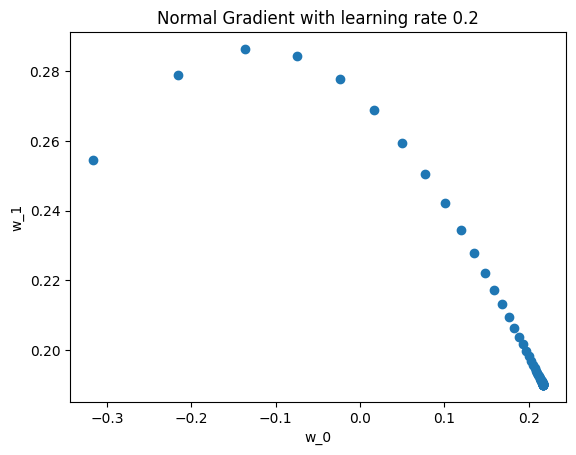

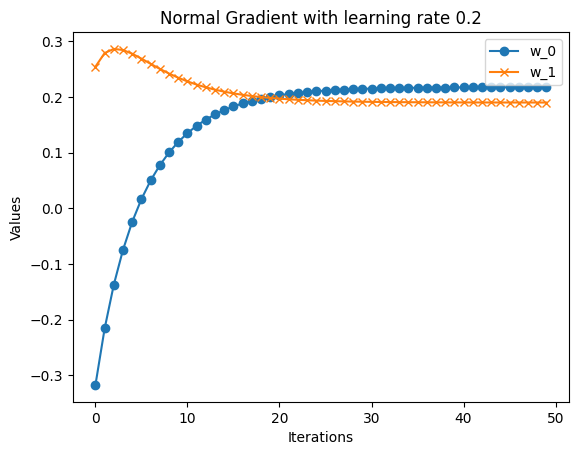

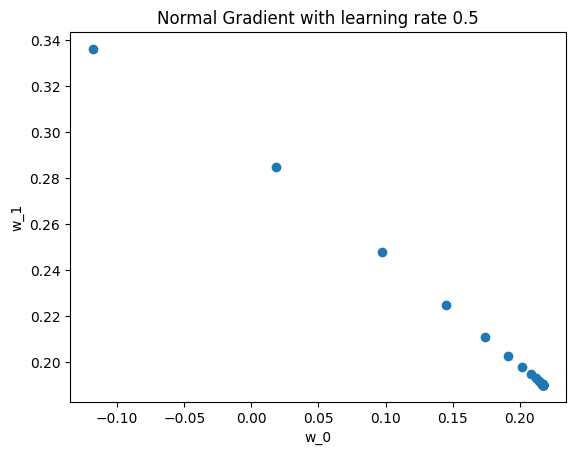

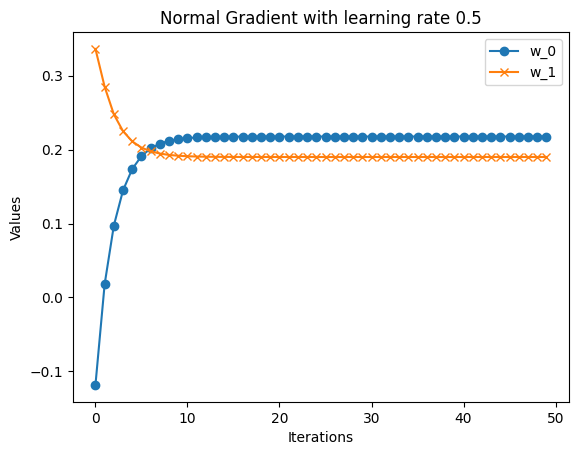

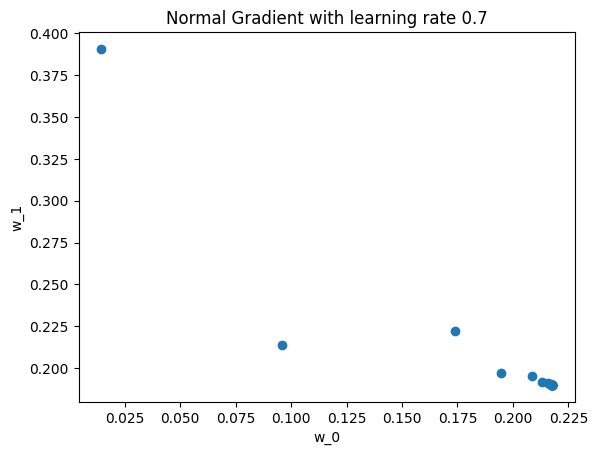

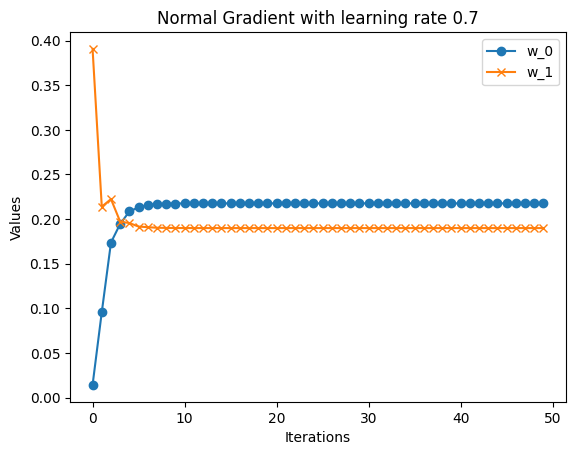

In [5]:
def make_scatterPlot_for_gradient_descent(first, second, learning_rate):
     plt.scatter(first, second)
     plt.xlabel("w_0")
     plt.ylabel("w_1")
     plt.title(f"Normal Gradient with learning rate {learning_rate}")
     plt.show()

def make_time_series_for_gradient_descent(first, second, learning_rate):
          # Generate a counter for the x-axis
     x = list(range(len(first)))

     # Plot the time series
     plt.plot(x, first, label='w_0', marker='o')
     plt.plot(x, second, label='w_1', marker='x')

     # Add labels, legend, and title
     plt.xlabel('Iterations')
     plt.ylabel('Values')
     plt.title(f"Normal Gradient with learning rate {learning_rate}")
     plt.legend()
     plt.show()


def vizualize_scatterplots_standard_gradient():
     my_perc = Perceptron(FIRST_INIT, 0.001, 50)
     for learning_rate in GRADIENT_DESCENT_LEARNING_RATES:
          first, second = my_perc.standard_gradient_descent(learning_rate=learning_rate)
          make_scatterPlot_for_gradient_descent(first, second, learning_rate)
          make_time_series_for_gradient_descent(first, second, learning_rate)


vizualize_scatterplots_standard_gradient()

In [6]:
my_perc2 = Perceptron(FIRST_INIT, 0.1, 30)
print(np.shape(my_perc2.cost_function_gradient(FIRST_INIT)))

print(my_perc2.anina_matia_mou())

(2, 1)
Kalimera


C:\Users\jojog\AppData\Local\Temp\ipykernel_14320\3815815905.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if float(denominator) != 0:
C:\Users\jojog\AppData\Local\Temp\ipykernel_14320\3815815905.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(nominator) / float(denominator)
C:\Users\jojog\AppData\Local\Temp\ipykernel_14320\3815815905.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_0.append(float(curr_weight_vector[0]))
C:\Users\jojo

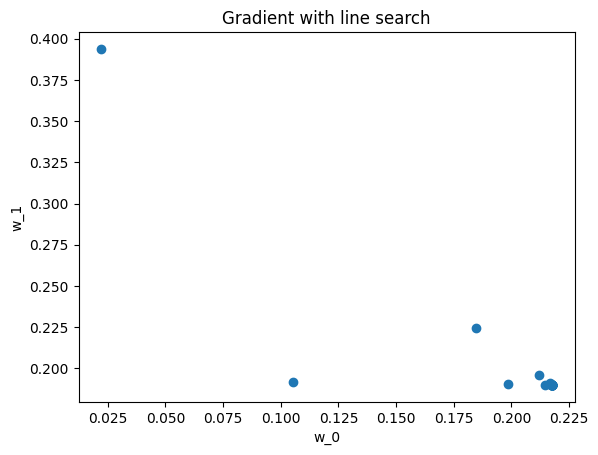

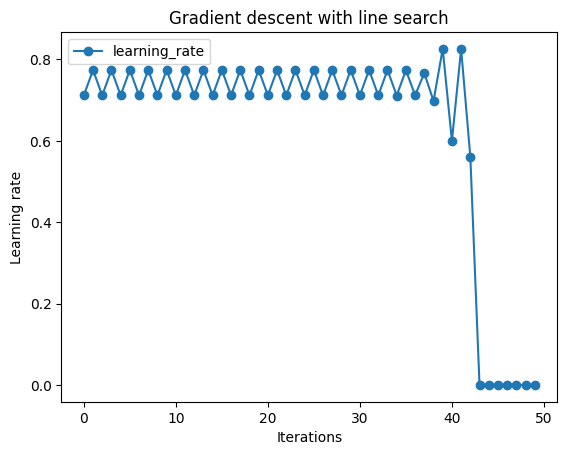

In [7]:
my_perc3 = Perceptron(FIRST_INIT, 0.001, 50)

w_1, w_2, learning_rate = my_perc3.line_search_gradient_descent()


def make_scatterplot_line_search(w_1, w_2):
     plt.scatter(w_1, w_2)
     plt.xlabel("w_0")
     plt.ylabel("w_1")
     plt.title(f"Gradient with line search")
     plt.show()

def plot_learning_rate(learning_rate):

     x = list(range(len(learning_rate)))
     # Plot the time series
     plt.plot(x, learning_rate, label='learning_rate', marker='o')
     # Add labels, legend, and title
     plt.xlabel('Iterations')
     plt.ylabel('Learning rate')
     plt.title(f"Gradient descent with line search")
     plt.legend()
     plt.show()
     

make_scatterplot_line_search(w_1, w_2)
plot_learning_rate(learning_rate)


In [12]:
my_perc4 = Perceptron(FIRST_INIT, 0.001, 50)

first_weight, second_weight, momnetums = my_perc4.conjugate_gradient_descent()


make_scatterplot_line_search(first_weight, second_weight)
plot_learning_rate(momnetums)

[[0.60910029 0.25006006]
 [0.25006006 0.10265967]]
[[0.663334  ]
 [0.27232517]]
[[-0.45]
 [ 0.2 ]]
[[-0.04596307 -0.28412666]
 [ 0.26809765  0.22795681]]


TypeError: only length-1 arrays can be converted to Python scalars

# Validation and Regularization




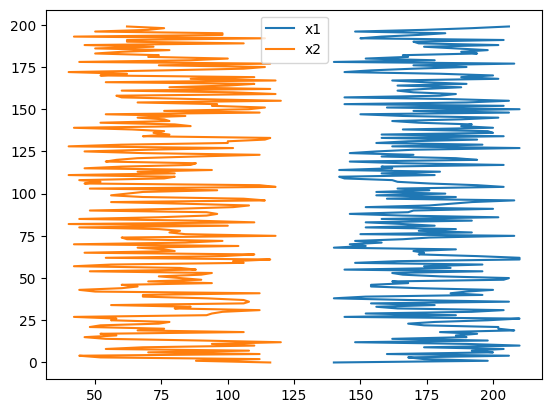

In [14]:
import pandas as pd

training_ridge = pd.read_csv("TrainingRidge.csv")

x = list(range(len(training_ridge)))

plt.plot(training_ridge["x1"], x, label="x1")
plt.plot(training_ridge["x2"], x, label="x2")
plt.legend()
plt.show()



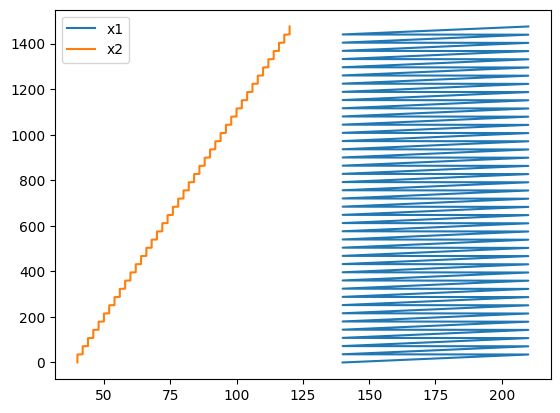

In [15]:
validation_ridge = pd.read_csv("ValidationRidge.csv")

x = list(range(len(validation_ridge)))

plt.plot(validation_ridge["x1"], x, label="x1")
plt.plot(validation_ridge["x2"], x, label="x2")
plt.legend()
plt.show()

In [18]:
regularization_parameters = np.arange(-4.0, 4.1, 0.1)
print(regularization_parameters)



[-4.00000000e+00 -3.90000000e+00 -3.80000000e+00 -3.70000000e+00
 -3.60000000e+00 -3.50000000e+00 -3.40000000e+00 -3.30000000e+00
 -3.20000000e+00 -3.10000000e+00 -3.00000000e+00 -2.90000000e+00
 -2.80000000e+00 -2.70000000e+00 -2.60000000e+00 -2.50000000e+00
 -2.40000000e+00 -2.30000000e+00 -2.20000000e+00 -2.10000000e+00
 -2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  3.55271368e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
  1.60000000e+00  1.70000000e+00  1.80000000e+00  1.90000000e+00
  2.00000000e+00  2.10000